In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

In [14]:

transform = transforms.Compose([ transforms.Resize(64),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225] ) ])

train_data_path = "/home/vaadmin/workspace/projects/pytorch-projects/dataset/train" 

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)

test_data_path = ""
val_data_path = ""



In [21]:
batch_size = 4
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True, num_workers=2)

In [22]:
next(iter(train_data_loader))

[tensor([[[[-0.4568, -0.3369, -0.4397,  ..., -0.8335, -0.8849, -0.8507],
           [-0.4911, -0.4226, -0.4397,  ..., -0.7993, -0.8164, -0.5767],
           [-0.6452, -0.7137, -0.5767,  ..., -0.1657, -0.7137, -0.7993],
           ...,
           [ 0.4508,  0.2282, -0.1828,  ..., -0.8507, -0.6794, -0.7650],
           [-0.2856, -0.4054, -0.4397,  ..., -0.8678, -0.6452, -0.4739],
           [-0.6965, -0.6281, -0.5596,  ..., -0.9534, -0.7650, -0.5596]],
 
          [[-0.3025, -0.1275, -0.1975,  ..., -0.2150, -0.4601, -0.6352],
           [-0.3200, -0.2150, -0.2150,  ..., -0.3550, -0.3200, -0.1800],
           [-0.4951, -0.5126, -0.3375,  ...,  0.0476, -0.3025, -0.4951],
           ...,
           [ 0.5203,  0.3452, -0.0399,  ..., -0.6877, -0.4426, -0.4601],
           [-0.1450, -0.2500, -0.2675,  ..., -0.6877, -0.4426, -0.2325],
           [-0.5301, -0.4776, -0.4426,  ..., -0.7227, -0.5651, -0.3375]],
 
          [[-0.3230, -0.0441, -0.1835,  ..., -0.5670, -0.7587, -0.7238],
           [-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


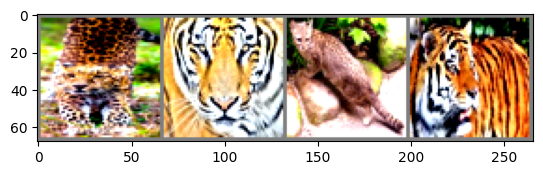

tensor([0, 9, 6, 9])


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_data_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x2704 and 400x120)